In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the data
df = pd.read_csv('C:\Users\LENOVO\Desktop\2.2\customer_data_records.csv')
print(df.head())

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (3602053114.py, line 7)

In [3]:
# Load the data
df = pd.read_csv(r'C:\Users\LENOVO\Desktop\2.2\customer_data_records.csv')
print(df.head())

   CustomerID  Annual Income (k$)  Spending Score (1-100)
0           1                 117                      20
1           2                 107                      59
2           3                  29                      36
3           4                 121                      19
4           5                  86                      90


In [7]:
x = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [8]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(x_scaled)

df['Cluster'] = clusters

NameError: name 'x_scaled' is not defined

In [9]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [10]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(x_scaled)

df['Cluster'] = clusters

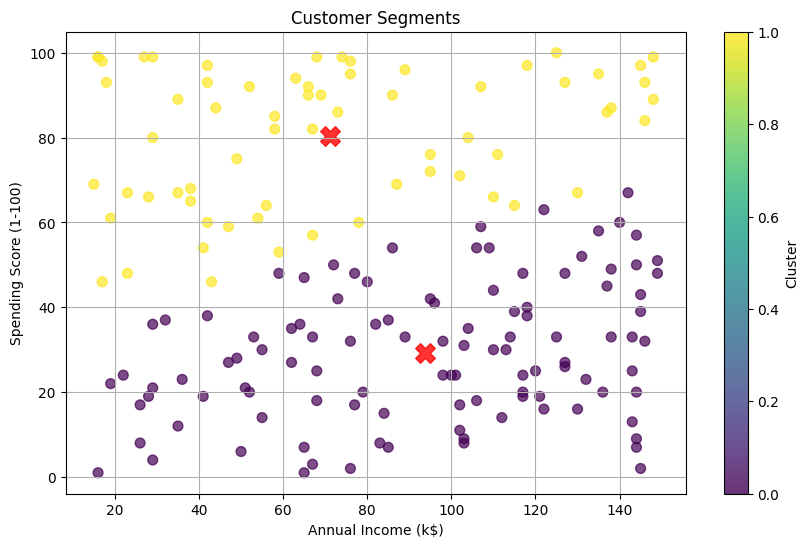

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], 
            c=df['Cluster'], cmap='viridis', s=50, alpha=0.7)


centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.8, marker='X')

plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [12]:
cluster_summary = df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(cluster_summary)

         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 93.768519               29.240741
1                 71.166667               80.333333
